In [2]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm


In [3]:
TEST_START_TIME      = "../../data/test_StartEndTime.csv"
TRAIN_START_TIME     = "../../data/train_StartEndTime.csv"


df_start_train = pd.read_csv(TRAIN_START_TIME)
df_start_test  = pd.read_csv(TEST_START_TIME)

df_start_train2 = df_start_train.dropna(axis=0).copy()
df_start_test2  = df_start_test.dropna(axis=0).copy()

df_start_train2.head(10)

,Id,Response,StartTime,EndTime
0,4,0,82.24,87.29
1,6,0,1313.12,1315.75
2,7,0,1618.70,1624.42
3,9,0,1149.20,1154.16
4,11,0,602.64,606.02
5,13,0,1331.66,1339.73
6,14,0,1662.63,1664.04
7,16,0,791.22,804.36
8,18,0,517.64,518.08
9,23,0,156.27,157.89


In [4]:
df_start_train2['StartTime'].values

array([   82.24,  1313.12,  1618.7 , ...,  1482.18,   608.83,   937.61])

<h3>開始時刻と終了時刻</h3>

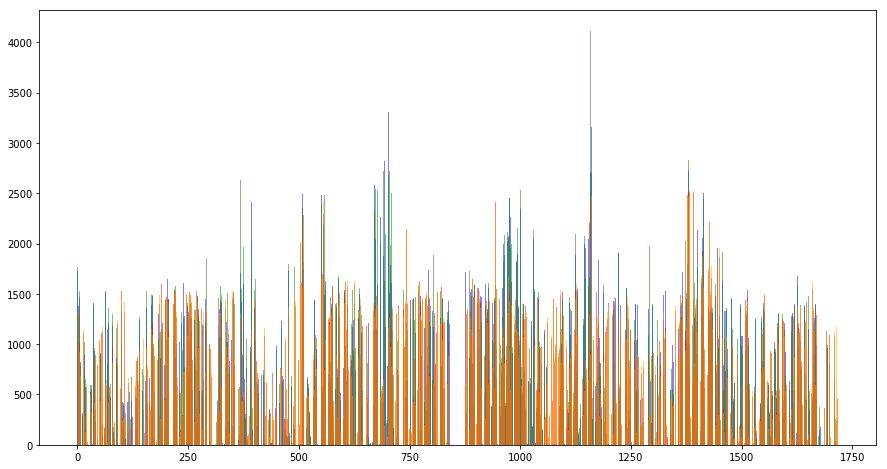

In [5]:
matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 8.0)

plt.hist(df_start_train2['StartTime'].values, bins=2000, alpha=0.5, color='blue')
plt.hist(df_start_test2['StartTime'].values,  bins=2000, alpha=0.5, color='green')
plt.hist(df_start_train2['EndTime'].values, bins=2000, alpha=0.5, color='red')
plt.hist(df_start_test2['EndTime'].values,  bins=2000, alpha=0.5, color='orange')

plt.show()

train, test の分布は重なっていて明確な偏りは観測できない。<br>
同期間にサンプルされたものから、データを分割して出してきているか、
別の期間だが期間の位相が完全に一致するように出してきているのではないか。<br>
安直に考えると前者(のほうがこちらが都合がよい) <br>


大きな余白が一か所。

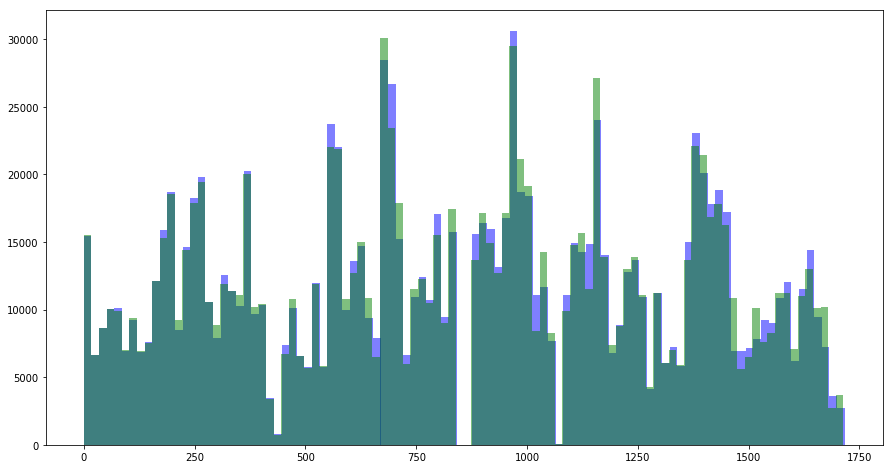

In [6]:

plt.hist(df_start_train2['StartTime'].values, bins=100, alpha=0.5, color='blue')
plt.hist(df_start_test2['StartTime'].values,  bins=100, alpha=0.5, color='green')

plt.show()

マクロに数がみられるもの。

<h3> 期間 </h3>

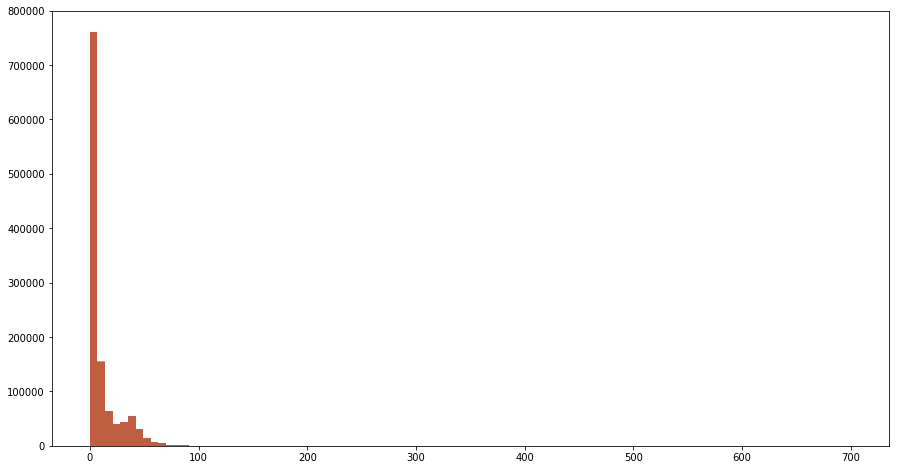

In [7]:
df_start_train2["Duration"] = -1
df_start_train2.loc[:, "Duration"] = df_start_train2['EndTime'] - df_start_train2['StartTime']
df_start_test2['Duration'] = 0
df_start_test2.loc[:, 'Duration'] = df_start_test2['EndTime'] - df_start_test2['StartTime']

plt.hist(df_start_test2['Duration'].values,  bins=100, alpha=0.5, color='green', range=[0, 700])
plt.hist(df_start_train2['Duration'].values, bins=100, alpha=0.5, color='red', range=[0, 700])
plt.show()

train, test の分布は完全に重なっている。

In [8]:
df_start_test2['Duration'].describe()

count    1.183165e+06
mean     1.069801e+01
std      1.704710e+01
min      0.000000e+00
25%      1.710000e+00
50%      3.680000e+00
75%      1.175000e+01
max      6.623700e+02
Name: Duration, dtype: float64

In [9]:
df_start_train2['Duration'].describe()

count    1.183165e+06
mean     1.071842e+01
std      1.701537e+01
min      0.000000e+00
25%      1.710000e+00
50%      3.700000e+00
75%      1.177000e+01
max      6.992000e+02
Name: Duration, dtype: float64

大体のものは100以下で終わっているが、時間がやたらとかかっているものもある。

### 開始時刻と結果

開始時刻に対してOK製品の数量と、
NG製品の数量をヒストグラムでプロット。
OK製品のScale を0.05 にしている。

おしなべて不良は発生しているが、特定の期間にやや多いようにも見える。

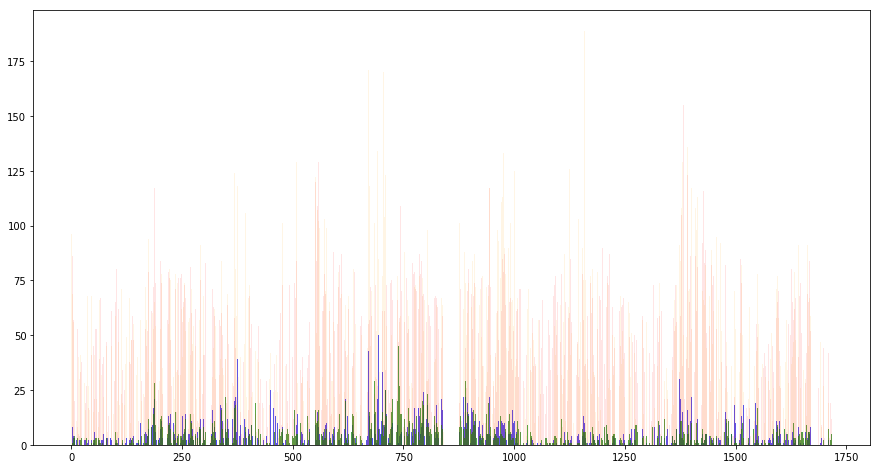

In [10]:
df_train_ng = df_start_train2[df_start_train2['Response'] == 1]
df_train_ok = df_start_train2[df_start_train2['Response'] == 0].sample(frac = 0.05)


plt.hist(df_train_ng['StartTime'], bins=2000, alpha = 0.7, color='blue')
plt.hist(df_train_ng['EndTime'], bins=2000,   alpha = 0.7, color='green')
plt.hist(df_train_ok['StartTime'], bins=2000, alpha = 0.1, color='orange')
plt.hist(df_train_ok['EndTime'], bins=2000,   alpha = 0.1, color='red')


plt.show()


### 期間と結果

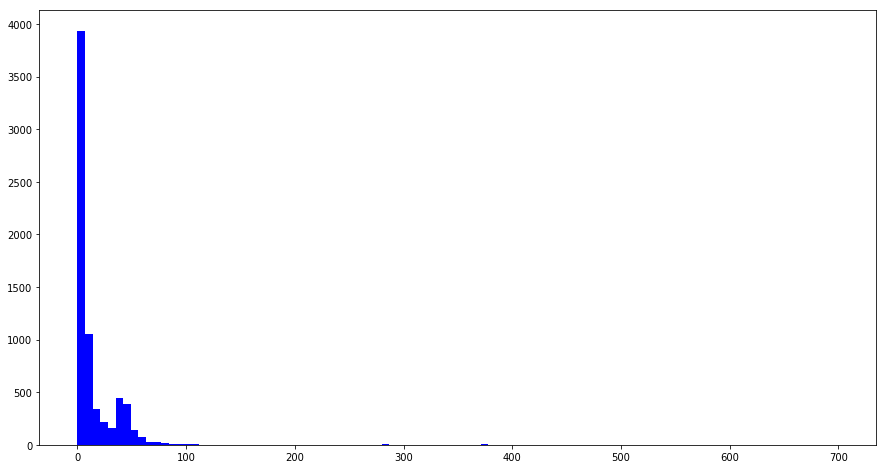

In [13]:
df_train_ok = df_start_train2[df_start_train2['Response'] == 0]
df_train_ng = df_start_train2[df_start_train2['Response'] == 1]

plt.hist(df_train_ng['Duration'], bins=100, color='blue', range=[0, 700])
plt.show()